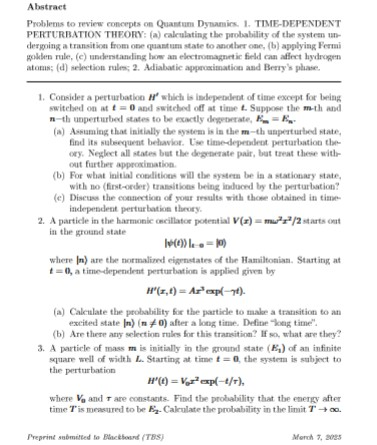

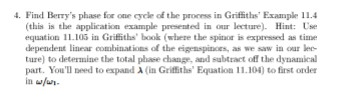

In [1]:
from IPython.display import Image
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.collections import LineCollection
#from scipy.special import hermite, factorial, eval_hermite
import os
import glob
import shutil
import matplotlib.style as style
import pandas as pd


style.use('dark_background')
plt.rcParams['text.usetex'] = False



#display screenshots
for i in range(1, 3):
    display(Image(filename=f'p_statement/p{i}.jpg'))

#file moving for housekeeping
def move_plots():
    output_dir = 'graphs'
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    #all gif and png
    files_to_move = glob.glob('*.png') + glob.glob('*.gif')

    for file in files_to_move:
        destination = os.path.join(output_dir, file)

        #if exists, replace
        if os.path.exists(destination):
            os.remove(destination)

        #move it
        shutil.move(file, destination)
        print(f'Moved {file} to {output_dir}')

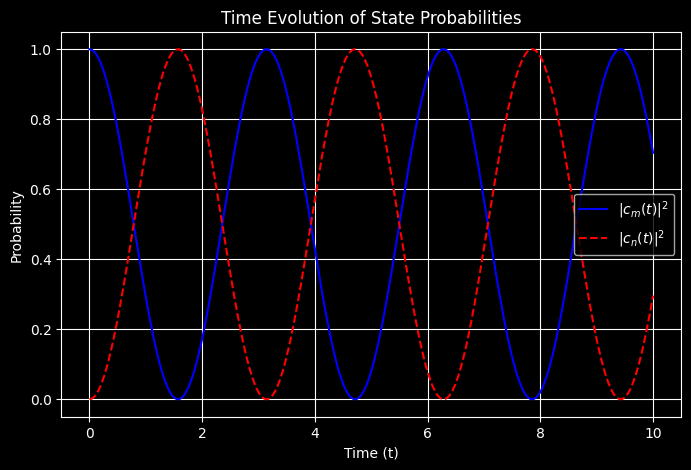

Max deviation from probability sum of 1: 0.00


In [4]:
##problem 1
#numerically first will go into graph

#params, will use arb units
hbar = 1
V = 1
t_vals = np.linspace(0, 10, 500)

#compute coeff
c_m = np.cos(V * t_vals / hbar)
c_n = -1j * np.sin(V * t_vals / hbar)  #e^(iθ) = 1 for simplicity

#plt
plt.figure(figsize=(8, 5))
plt.plot(t_vals, np.abs(c_m)**2, label=r'$|c_m(t)|^2$', linestyle='-', color='b')
plt.plot(t_vals, np.abs(c_n)**2, label=r'$|c_n(t)|^2$', linestyle='--', color='r')
plt.xlabel('Time (t)')
plt.ylabel('Probability')
plt.title('Time Evolution of State Probabilities')
plt.legend()
plt.grid()
plt.show()

#verify numerically for probability conservation
prob_sum = np.abs(c_m)**2 + np.abs(c_n)**2
print(f"Max deviation from probability sum of 1: {np.max(np.abs(prob_sum - 1)):.2f}")

In [24]:
#step 1 def hamiltonian in degen subspace
H_prime = sp.Matrix([[sp.Symbol('epsilon', real=True), V], 
                     [V, sp.Symbol('epsilon', real=True)]])

#solve eigevalues of H'
eigenvalues = H_prime.eigenvals()
print('eigenvalues of H:')
display(eigenvalues)


#solve for evects of H'
eigenvectors = H_prime.eigenvects()
print('the eigenvectors of H:\n\n')
sp.pprint(eigenvectors)


#def coupled diffeq for t-evo
c_m, c_n = sp.Function('c_m')(t), sp.Function('c_n')(t)
eq1 = sp.Eq(sp.I * hbar * sp.diff(c_m, t), V * c_n)
eq2 = sp.Eq(sp.I * hbar * sp.diff(c_n, t), V * c_m)
print('coupled diffeqs are:')
display(eq1,eq2)

#sympy solve it
solution = sp.dsolve([eq1, eq2], [c_m, c_n])
print('The solution:\n\n')
sp.pprint(solution)

#solve for c1 and c2 bc we know c_m(0) = 1, c_n(0) = 0
initial_conditions = [
    solution[0].subs(t, 0).rhs - 1,  #c_m(0) = 1
    solution[1].subs(t, 0).rhs       #c_n(0) = 0
]

#solve and print
C_values = sp.solve(initial_conditions, ['C1', 'C2'])
print('the values for C are:')
display(C_values)




eigenvalues of H:


{V + epsilon: 1, -V + epsilon: 1}

the eigenvectors of H:


⎡⎛           ⎡⎡-1⎤⎤⎞  ⎛          ⎡⎡1⎤⎤⎞⎤
⎢⎜-V + ε, 1, ⎢⎢  ⎥⎥⎟, ⎜V + ε, 1, ⎢⎢ ⎥⎥⎟⎥
⎣⎝           ⎣⎣1 ⎦⎦⎠  ⎝          ⎣⎣1⎦⎦⎠⎦
coupled diffeqs are:


Eq(I*hbar*Derivative(c_m(t), t), V*c_n(t))

Eq(I*hbar*Derivative(c_n(t), t), V*c_m(t))

The solution:


⎡            -ⅈ⋅V⋅t        ⅈ⋅V⋅t              -ⅈ⋅V⋅t        ⅈ⋅V⋅t⎤
⎢            ───────       ─────              ───────       ─────⎥
⎢               h̅            h̅                   h̅            h̅  ⎥
⎣cₘ(t) = C₁⋅ℯ        - C₂⋅ℯ     , cₙ(t) = C₁⋅ℯ        + C₂⋅ℯ     ⎦
the values for C are:


{C1: 1/2, C2: -1/2}

In [15]:
# Define symbolic variables
t, V, hbar = sp.symbols('t V hbar', real=True, positive=True)

# Define the time-dependent coefficients
c_m_sym = sp.cos(V * t / hbar)
c_n_sym = -sp.I * sp.sin(V * t / hbar)  # Assuming e^(iθ) = 1

# Compute probability conservation check symbolically
prob_sum_sym = sp.simplify(sp.Abs(c_m_sym)**2 + sp.Abs(c_n_sym)**2)

# Display results
c_m_sym, c_n_sym, prob_sum_sym

(cos(V*t/hbar), -I*sin(V*t/hbar), 1)